Import necessary libraries

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

Define Sigmoid function

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Load the dataset

In [7]:
file_path = 'titanic.csv'  # Update this path as needed
titanic_data = pd.read_csv(file_path)

Data Preprocessing

In [8]:
titanic_data = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data.dropna(subset=['Embarked'], inplace=True)

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_27236\181184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


Encode categorical features

In [9]:
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

Define features and target

In [10]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

Split data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression with Regularization

In [12]:
model = LogisticRegression(max_iter=1000, penalty='l2', C=1.0)  # Adjust C for regularization strength
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Predict on training and testing sets

In [13]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Check if model is underfitting or overfitting

In [14]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [15]:
if train_accuracy > test_accuracy + 0.1:
    fit_status = "Overfitting detected"
elif test_accuracy > train_accuracy + 0.1:
    fit_status = "Underfitting detected"
else:
    fit_status = "Good fit"

Calculate accuracy and F1-score on test data

In [16]:
test_f1 = f1_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

Display results

In [17]:
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Fit Status: {fit_status}")
print("\nClassification Report:\n", classification_rep)

Train Accuracy: 0.80
Test Accuracy: 0.78
Fit Status: Good fit

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



Visualizations

Plot 1: Distribution of 'Age' by Survival

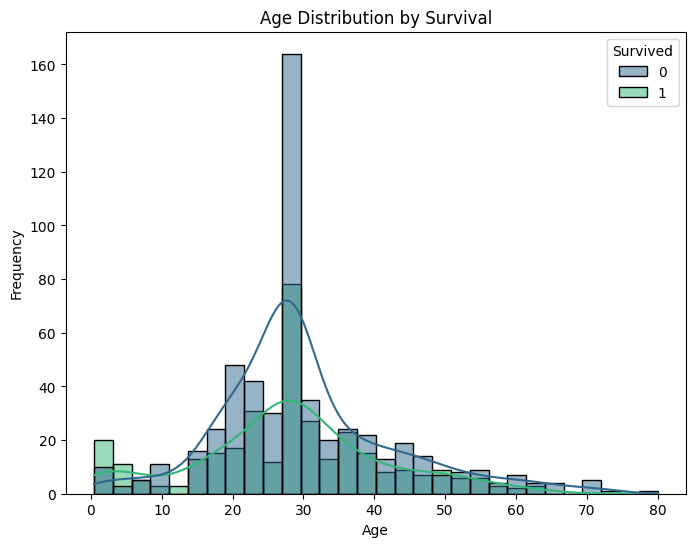

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=titanic_data, x='Age', hue='Survived', kde=True, palette="viridis")
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Plot 2: Correlation Matrix of Features

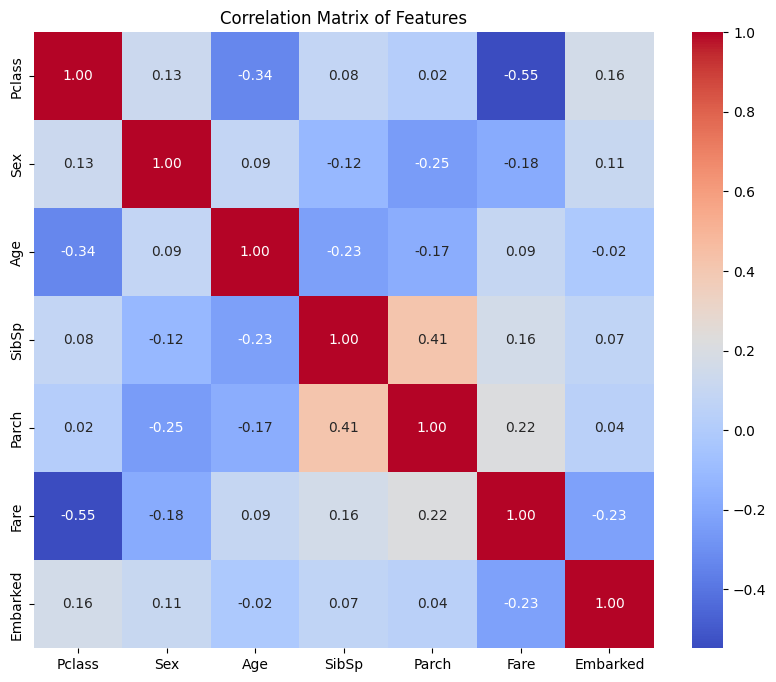

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()

Plot 3: Confusion Matrix

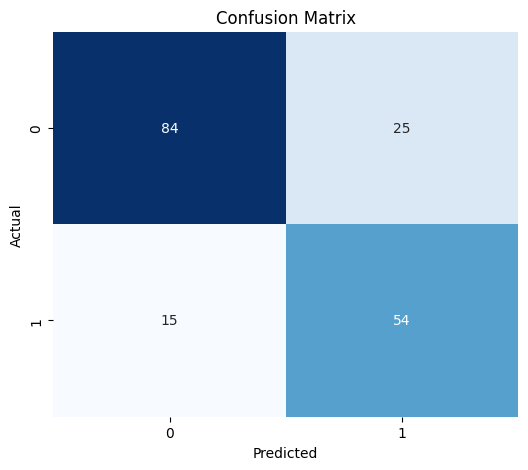

In [20]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()